In [332]:
 #pip install dash

Note: you may need to restart the kernel to use updated packages.


In [333]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [210]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
#color_pal = sns.color_palette()
#plt.style.use('fivethirtyeight')

# Data Reading 

In [211]:
df=pd.read_excel("D:\\GDP\\Needed data For GDP prediction - 18-10-2022.xlsx",sheet_name='Data')
df

,Time Frame,Date,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
0,الربع الأول 2002/2001,2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,-,-,NaN,-,-,-
1,الربع الثاني 2002/2001,2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,-,-,NaN,-,-,-
2,الربع الثالث 2002/2001,2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,-,-,NaN,-,-,-
3,الربع الرابع 2002/2001,2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,-,-,NaN,-,-,-
4,الربع الأول 2003/2002,2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,-,3.3,NaN,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,الربع الأول 2022/2021,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
81,الربع الثاتي 2022/2021,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
82,الربع الثالث 2022/2021,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8
83,الربع الراابع 2021/2022,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,46.366667,52,52.3,52.7


# Replace '-' by non

In [212]:
df.replace(to_replace='-',value=np.nan,inplace=True)
df

,Time Frame,Date,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
0,الربع الأول 2002/2001,2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,NaN,NaN,NaN,NaN,NaN,NaN
1,الربع الثاني 2002/2001,2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,NaN,NaN,NaN,NaN,NaN,NaN
2,الربع الثالث 2002/2001,2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,NaN,NaN,NaN,NaN,NaN,NaN
3,الربع الرابع 2002/2001,2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,NaN,NaN,NaN,NaN,NaN,NaN
4,الربع الأول 2003/2002,2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,NaN,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,الربع الأول 2022/2021,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
81,الربع الثاتي 2022/2021,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
82,الربع الثالث 2022/2021,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8
83,الربع الراابع 2021/2022,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,46.366667,52.0,52.3,52.7


In [213]:
df.iloc[:,3]

0      71.64
1      76.87
2      79.87
3     105.10
4      68.82
       ...  
80       NaN
81       NaN
82       NaN
83       NaN
84       NaN
Name: Total investment and stock  at market prices & constant  prices (L.E B.) , Length: 85, dtype: float64

# Descriptive analysis

In [214]:
df.describe()

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
count,80.000000,80.000000,80.000000,80.000000,80.000000,42.000000,83.000000,76.000000,83.000000,78.000000,79.000000,21.000000,19.000000,19.000000,18.000000
mean,652.868625,119.705250,140.264500,190.241000,722.597625,9355.700587,10.100703,1562.327092,3764.814458,10.449615,4.473418,48.182540,51.652632,51.742105,51.733333
std,185.598438,32.854323,37.084263,49.020435,174.005074,512.238962,6.130527,1302.659961,2402.596320,1.974968,2.256939,2.548079,4.233775,2.811547,4.718798
min,379.210000,59.740000,76.910000,97.570000,438.610000,8523.918530,2.165570,295.053000,655.200000,7.200000,-4.300000,38.333333,36.800000,43.300000,35.600000
25%,481.130000,92.610000,108.322500,161.412500,577.620000,8996.094909,5.763919,582.713750,1383.300000,8.932500,3.300000,47.500000,51.500000,50.450000,51.675000
50%,641.240000,118.520000,147.355000,183.215000,722.365000,9231.043905,9.551989,982.102000,4067.000000,10.485000,4.900000,49.050000,52.700000,52.300000,52.750000
75%,794.445000,142.795000,165.550000,218.470000,843.162500,9727.313506,12.125790,2286.508750,5768.200000,12.400000,5.600000,49.533333,53.650000,53.650000,53.400000
max,1033.500000,193.700000,233.610000,309.000000,1066.300000,10464.180569,32.145973,4742.107000,8145.900000,13.400000,9.800000,50.166667,57.200000,55.800000,58.000000


In [215]:
df = df.set_index('Date')
#df.index = pd.to_datetime(df.index)
df

,Time Frame,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,,
2001-09-30,الربع الأول 2002/2001,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,الربع الثاني 2002/2001,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,الربع الثالث 2002/2001,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,الربع الرابع 2002/2001,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-30,الربع الأول 2003/2002,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,NaN,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,الربع الأول 2022/2021,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
2021-12-31,الربع الثاتي 2022/2021,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
2022-03-31,الربع الثالث 2022/2021,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8


In [216]:
df.drop(['Time Frame'],axis=1,inplace=True)
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,NaN,3.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8


# EDA

In [217]:
scaler = MinMaxScaler()
df_min_max=scaler.fit_transform(df)
df_min_max=pd.DataFrame(df_min_max,columns=df.columns,index=df.index)
df_min_max
import plotly.express as px
fig = px.line(df_min_max,x=df_min_max.index,y=df_min_max.columns,width=1500, height=500,markers=True)
fig.show()

In [218]:
#f, ax = plt.subplots(nrows=2, ncols=2, figsize=(2*width, 2*height))
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Have some time series data (via pandas)


# Select relevant data, index by Date
data = df.set_index(['Date'])

plot_acf(data['Unemployment Rate %'])

# Show the data as a plot (via matplotlib)
plt.show()

KeyError: "None of ['Date'] are in the columns"

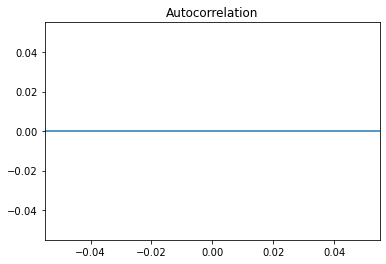

In [219]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(df['GDP Growth Rate ( annual) (%)'],lags=84)
# Show the AR as a plot
plt.show()

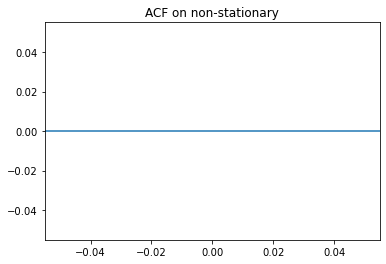

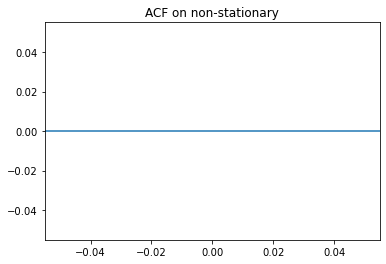

In [220]:
plot_acf(df['GDP Growth Rate ( annual) (%)'], lags=50, title='ACF on non-stationary')
#plot_pacf(train_mini['Close'], lags=20, ax=ax[0, 1], method='ols', title='PACF on non-stationary')

In [221]:
#df.shift(periods=3, fill_value=0).tail()

In [222]:
#print(df.shift(periods=2, fill_value=0))

In [223]:
#df.shift(-1)

# Data preprocessing

- Filling Nulls

In [224]:
df.isna().sum()

Total Final consumption at market prices & constant  prices (L.E B.)                              5
Total investment and stock  at market prices & constant  prices (L.E B.)                          5
Exports of goods and services (L.E B.)                                                            5
Imports of goods and services (L.E B.)                                                            5
GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)     5
GDP Per Capita (000 $)                                                                           43
Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF                                     2
Total Domestic Debt\n(L.E B.)\nCBE                                                                9
Workers Remittance ($  Million)                                                                   2
Unemployment Rate %                                                                               7


In [225]:
df=df.fillna(df.median()) # using median to fill nulls
df.head(80)

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.91,97.57,438.61,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75
2001-12-31,401.86,76.87,78.82,103.14,454.41,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75
2002-03-31,421.28,79.87,91.36,105.97,486.53,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75
2002-06-30,382.49,105.10,91.96,112.17,467.38,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75
2002-09-30,407.09,68.82,91.62,114.42,453.11,9231.043905,2.736786,343.555,738.4,10.485,3.3,49.050000,52.7,52.3,52.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,1018.60,82.60,85.10,196.30,990.00,9850.746269,5.400240,4742.107,7869.0,9.600,-1.7,38.333333,36.8,43.3,35.60
2020-09-30,957.60,93.20,97.80,166.00,982.60,9738.354807,3.753137,982.102,8028.1,7.300,0.7,49.800000,52.0,51.6,51.60
2020-12-31,977.40,119.80,106.40,179.00,1024.60,10114.511352,5.213860,982.102,7493.3,7.200,2.0,50.166667,53.0,53.6,52.30


- Set Date as index

In [226]:
#df = df.set_index('Date')
#df.index = pd.to_datetime(df.index)

In [227]:
idx=df.columns.get_loc('GDP Growth Rate ( annual) (%)')
idx

10

- Scalling

In [228]:
#scaler = MinMaxScaler()
#df_min_max=scaler.fit_transform(df)
#df_min_max=pd.DataFrame(df_min_max,columns=df.columns,index=df.index)
#df_min_max

# Feature engineering  

- Trial one 

In [19]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	#if dropnan:
		#agg.dropna(inplace=True)
	return agg


raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data_lagged=series_to_supervised(df,4,1)
data_lagged

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75
2002-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75,382.49,105.10,91.960,112.170,467.380,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75
2002-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75,382.49,105.10,91.960,112.170,467.380,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75,407.09,68.82,91.620,114.420,453.110,9231.043905,2.736786,343.555,738.4,10.485,3.3,49.050000,52.7,52.3,52.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,957.60,93.20,97.800,166.000,982.600,9738.354807,3.753137,982.102,8028.1,7.300,0.7,49.800000,52.0,51.6,51.60,977.40,119.80,106.400,179.000,1024.600,10114.511352,5.213860,982.102,7493.3,7.200,2.0,50.166667,53.0,53.6,52.30,1013.60,133.10,146.100,238.200,1054.600,10379.921260,4.401757,982.102,7849.6,7.400,2.9,48.666667,53.4,54.2,53.00,1033.50,162.20,130.800,260.200,1066.300,10464.180569,4.640609,982.102,7849.6,7.300,7.7,48.733333,57.2,55.8,58.00,641.24,118.52,147.355,183.215,722.365,9231.043905,5.891552,982.102,8145.9,7.500,9.8,49.266667,53.9,54.5,54.30
2021-12-31,977.40,119.80,1

- Tril two

In [63]:
from statsmodels.tsa.tsatools import lagmat
data_lagged = lagmat(df,maxlag=4,use_pandas=True,original='in',trim='forward')
data_lagged[['Total Domestic Debt\n(L.E B.)\nCBE','Total Domestic Debt\n(L.E B.)\nCBE.L.1',\
             'Total Domestic Debt\n(L.E B.)\nCBE.L.2',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.3',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.4']]
#\,'Total Final consumption at market prices & constant prices (L.E B.).L.1']]
data_lagged

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.00

# Cross validation 

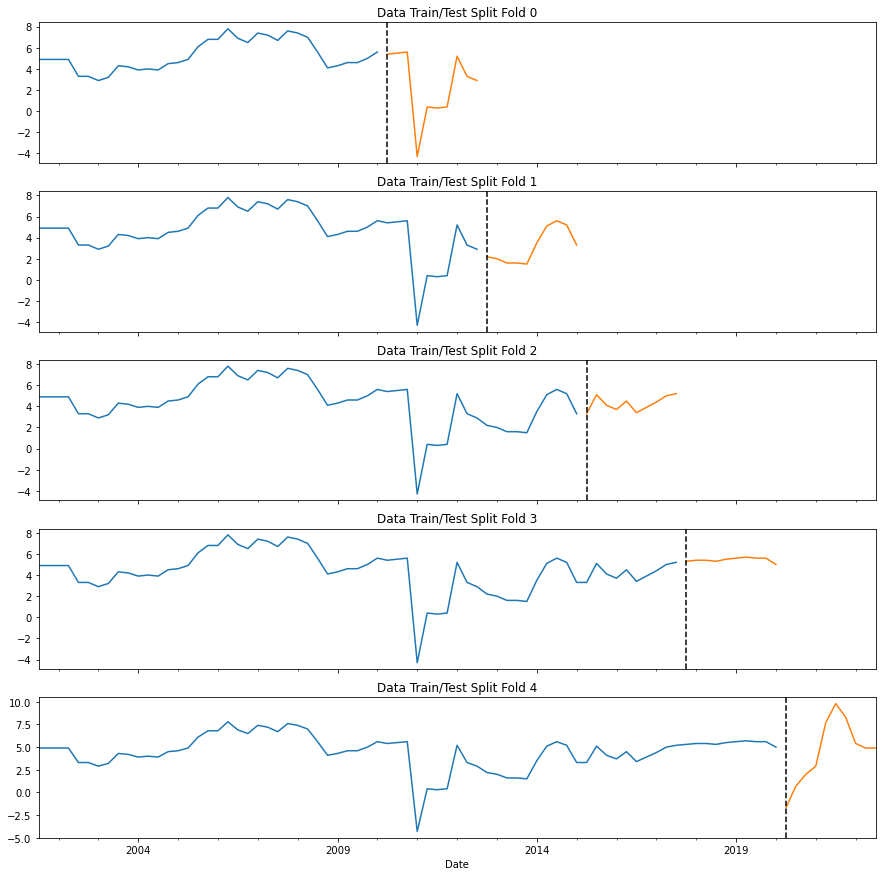

In [64]:
tss = TimeSeriesSplit(n_splits=5,test_size=10,gap=0)
#color_pal = sns.color_palette()
#plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(data_lagged):
    train = data_lagged.iloc[train_idx]
    test = data_lagged.iloc[val_idx]
    train['GDP Growth Rate ( annual) (%)'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['GDP Growth Rate ( annual) (%)'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [65]:
data_lagged = data_lagged.sort_index()
fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(data_lagged):
    train = data_lagged.iloc[train_idx]
    test = data_lagged.iloc[val_idx]

    #train = create_features(train)
    #test = create_features(test)

    FEATURES=data_lagged.columns.drop('GDP Growth Rate ( annual) (%)')
    TARGET='GDP Growth Rate ( annual) (%)'
    
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg=xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[03:56:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.93227	validation_1-rmse:3.63808
[1]	validation_0-rmse:4.88695	validation_1-rmse:3.61861
[2]	validation_0-rmse:4.84206	validation_1-rmse:3.59961
[3]	validation_0-rmse:4.79759	validation_1-rmse:3.58105
[4]	validation_0-rmse:4.75356	validation_1-rmse:3.56293
[5]	validation_0-rmse:4.70994	validation_1-rmse:3.54526
[6]	validation_0-rmse:4.66674	validation_1-rmse:3.52802
[7]	validation_0-rmse:4.62396	validation_1-rmse:3.51121
[8]	validation_0-rmse:4.58159	validation_1-rmse:3.49482
[9]	validation_0-rmse:4.53962	validation_1-rmse:3.47885
[10]	validation_0-rmse:4.49806	validation_1-rmse:3.46329
[11]	validation_0-rmse:4.45689	validation_1-rmse:3.44814
[12]	validation_0-rmse:4.41612	validation_1-rmse:3.43339
[13]	validation_0-rmse:4.37575	validation_1-rmse:3.41904
[14]	validation_0-rmse:4.33576	vali

In [66]:
print(f'sqr Mean Score across folds {np.mean(scores):0.5f}')
print(f'Fold scores:{scores}')

sqr Mean Score across folds 1.85283
Fold scores:[2.9877421930572967, 1.6122577892494752, 0.7662250941566924, 0.8763023465558277, 3.0216028251361635]


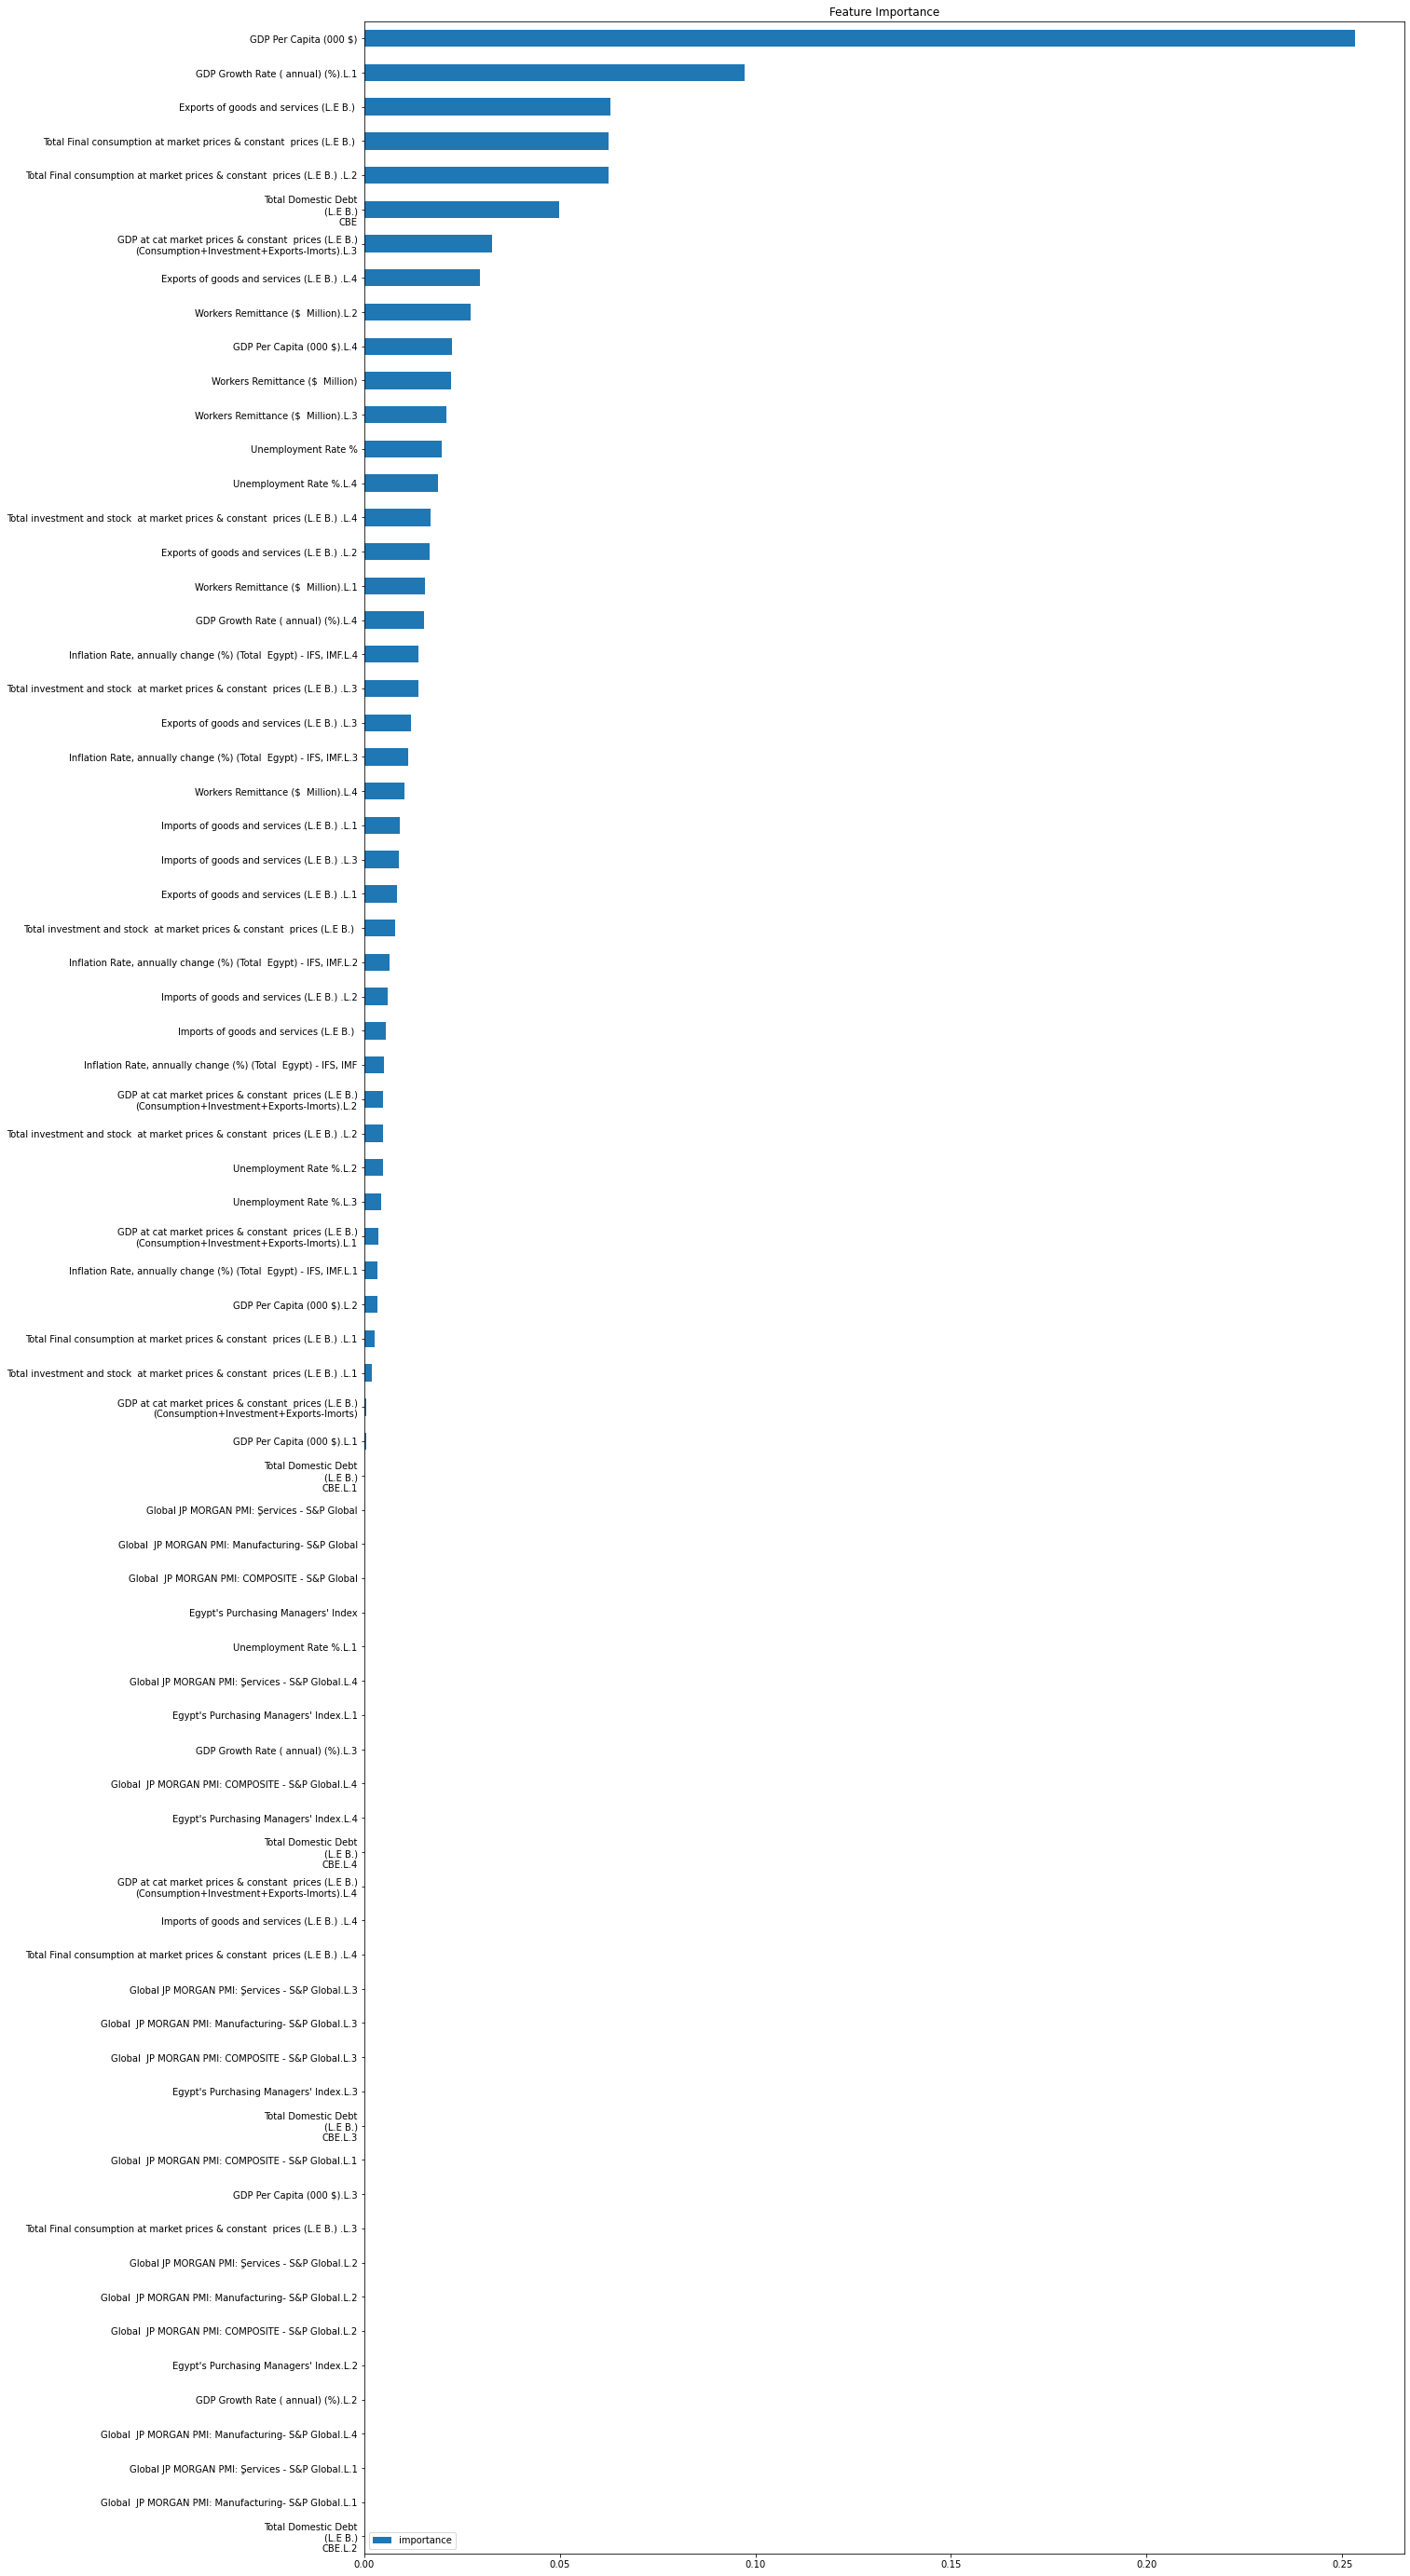

In [67]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance',figsize=(20,50))
plt.show()

# Data Splitting

In [68]:
train_size = int(len(data_lagged) * 0.8)
test_size = len(data_lagged)- train_size
train=data_lagged[0:train_size]
test=data_lagged[train_size:len(data_lagged)]
train.shape,test.shape

((68, 75), (17, 75))

- Another splitting by date

In [69]:
#train = data.loc[data.index < '2021-6-30']
#test = data.loc[data.index >= '2021-6-30']

In [70]:
#train.dropna(inplace=True)
#train

In [71]:
#scaler=MinMaxScaler()
#train[train.columns]=scaler.fit_transform(train[train.columns])
#test[test.columns]=scaler.fit_transform(test[test.columns])

In [72]:
len(test) , len(train)

(17, 68)

In [73]:
FEATURES = data_lagged.columns.drop('GDP Growth Rate ( annual) (%)')
TARGET='GDP Growth Rate ( annual) (%)'
X_train=train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [74]:
X_test.shape,X_train.shape

((17, 74), (68, 74))

In [75]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.1,n_jobs=-1)
reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

[04:00:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.99268	validation_1-rmse:4.75263
[1]	validation_0-rmse:3.63125	validation_1-rmse:4.35994
[2]	validation_0-rmse:3.30502	validation_1-rmse:4.06360
[3]	validation_0-rmse:3.01095	validation_1-rmse:3.82131
[4]	validation_0-rmse:2.74521	validation_1-rmse:3.58089
[5]	validation_0-rmse:2.50519	validation_1-rmse:3.37104
[6]	validation_0-rmse:2.28713	validation_1-rmse:3.19408
[7]	validation_0-rmse:2.09066	validation_1-rmse:3.04733
[8]	validation_0-rmse:1.91450	validation_1-rmse:2.92148
[9]	validation_0-rmse:1.75438	validation_1-rmse:2.80939
[10]	validation_0-rmse:1.60949	validation_1-rmse:2.75008
[11]	validation_0-rmse:1.47554	validation_1-rmse:2.70320
[12]	validation_0-rmse:1.35704	validation_1-rmse:2.64919
[13]	validation_0-rmse:1.24713	validation_1-rmse:2.61769
[14]	validation_0-rmse:1.15178	vali

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [76]:
y_pred=reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.3357954443039386

In [77]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)*100

65.93636568177634

In [78]:
test['y_pred']=reg.predict(X_test)
test[['y_pred','GDP Growth Rate ( annual) (%)']]

,y_pred,GDP Growth Rate ( annual) (%)
Date,,
2018-09-30,5.229093,5.3
2018-12-31,5.229093,5.5
2019-03-31,4.500652,5.6
2019-06-30,4.349387,5.7
2019-09-30,5.035820,5.6
2019-12-31,3.432202,5.6
2020-03-31,3.492265,5.0
2020-06-30,3.324419,-1.7
2020-09-30,3.740425,0.7


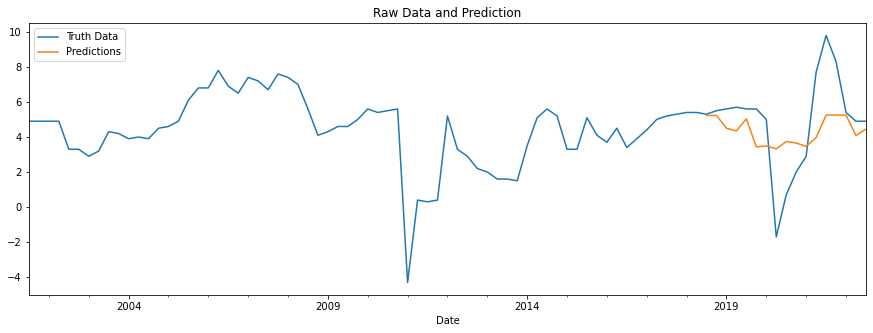

In [83]:
ax = data_lagged[['GDP Growth Rate ( annual) (%)']].plot(style='-',figsize=(15, 5))
test['y_pred'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

# Forecast with base case 
- Assuming now change in independent variables and forecast one step

In [84]:
df.index.max()

Timestamp('2022-09-30 00:00:00')

In [85]:
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
Date,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75
2001-12-31,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75
2002-03-31,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75
2002-06-30,382.49,105.10,91.960,112.170,467.380,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75
2002-09-30,407.09,68.82,91.620,114.420,453.110,9231.043905,2.736786,343.555,738.4,10.485,3.3,49.050000,52.7,52.3,52.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,641.24,118.52,147.355,183.215,722.365,9231.043905,5.891552,982.102,8145.9,7.500,9.8,49.266667,53.9,54.5,54.30
2021-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,5.887123,982.102,7437.2,7.400,8.3,48.800000,54.5,54.2,55.30
2022-03-31,641.24,118.52,147.355,183.215,722.365,9231.043905,8.849226,982.102,8045.7,7.200,5.4,47.500000,52.4,53.3,52.80


In [171]:
future = pd.date_range('2022-12-31','2022-12-31',freq='Q')
future_df = pd.DataFrame(index=future)
#future_df['isFuture'] = True
#df['isFuture']=False
df_and_future=pd.concat([df,future_df])
#df_and_future = create_features(df_and_future)
#df_and_future = add_lags(df_and_future)
#future=series_to_supervised(df_and_future,4,1)

future=lagmat(df_and_future,maxlag=4,use_pandas=True,original='in',trim='forward')
future
#from statsmodels.tsa.tsatools import lagmat
#data_lagged = lagmat(df,maxlag=4,use_pandas=True,original='in',trim='forward')
future[['Total Domestic Debt\n(L.E B.)\nCBE','Total Domestic Debt\n(L.E B.)\nCBE.L.1',\
             'Total Domestic Debt\n(L.E B.)\nCBE.L.2',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.3',\
            'Total Domestic Debt\n(L.E B.)\nCBE.L.4']]
#\,'Total Final consumption at market prices & constant prices (L.E B.).L.1']]
#data_lagged
future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.

In [172]:
cols= future.columns.drop('GDP Growth Rate ( annual) (%)')
# assuming all varibalise is constant
future.loc[:,cols] = future.loc[:,cols].ffill(axis = 0)
future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.

In [173]:
future_w_features=future.loc['2022-12-31':]
future_w_features.shape

(1, 75)

In [174]:
future_w_features[FEATURES]

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2022-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,10.485,47.2,49.9,50.4,50.1,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,10.485,4.9,47.2,49.9,50.4,50.1,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,7.2,4.9,46.366667,52.0,52.3,52.7,641.24,118.52,147.355,18

In [175]:
future_w_features['pred']=reg.predict(future_w_features[FEATURES])
future_w_features

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4,pred
2022-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,10.485,NaN,47.2,49.9,50.4,50.1,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,10.485,4.9,47.2,49.9,50.4,50.1,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,7.2,4.9,46.366667,

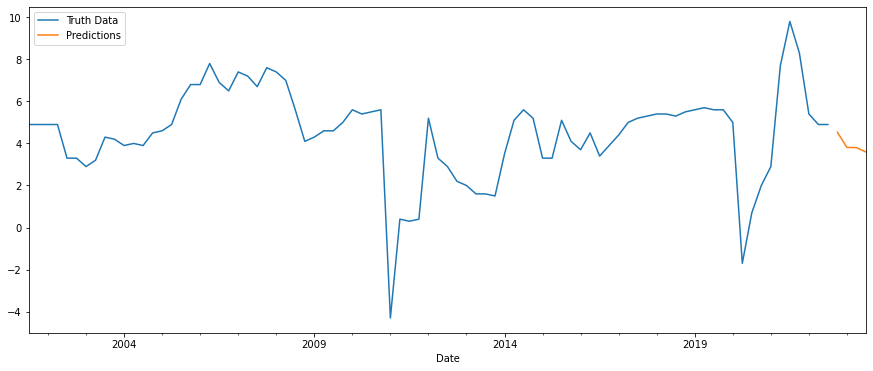

In [209]:
df['GDP Growth Rate ( annual) (%)'].plot(style='-',figsize=(15,6))#['PJME_MW']
future_w_features['pred'].plot(style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

# Forecast with Rolling Mean 

In [188]:
future1=pd.date_range('2022-12-31','2023-9-30',freq='Q')
future_df1= pd.DataFrame(index=future1)
df_and_future1=pd.concat([df,future_df1])
df_and_future1

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.05,52.7,52.3,52.75
2001-12-31,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.05,52.7,52.3,52.75
2002-03-31,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.05,52.7,52.3,52.75
2002-06-30,382.49,105.10,91.960,112.170,467.380,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.05,52.7,52.3,52.75
2002-09-30,407.09,68.82,91.620,114.420,453.110,9231.043905,2.736786,343.555,738.4,10.485,3.3,49.05,52.7,52.3,52.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,10.485,4.9,47.20,49.9,50.4,50.10
2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_rolling_future=df_and_future1.interpolate('index').rolling(4).mean()
df_rolling_future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-30,398.315,83.370,84.7625,104.7125,461.7325,9231.043905,2.433367,307.0120,738.125,10.48500,4.900,49.050000,52.700,52.300,52.750
2002-09-30,403.180,82.665,88.4400,108.9250,465.3575,9231.043905,2.576171,319.1375,732.925,10.48500,4.500,49.050000,52.700,52.300,52.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,641.240,118.520,147.3550,183.2150,722.3650,9231.043905,8.460082,982.1020,5904.225,8.07125,5.875,47.466667,52.200,52.550,52.725
2022-12-31,641.240,118.520,147.3550,183.2150,722.3650,9231.043905,9.376298,982.1020,5061.675,8.84250,5.025,47.066667,51.050,51.600,51.425
2023-03-31,641.240,118.520,147.3550,183.2150,722.3650,9231.043905,9.551989,982.1020,4067.000,9.66375,4.900,46.991667,50.425,50.875,50.750
2023-06-30,641.240,118.520,147.3550,183.2150,722.3650,9231.043905,9.551989,982.1020,4067.000,10.48500,4.900,47.200000,49.900,50.400,50.100


In [198]:
#future_df = pd.DataFrame(index=future)
#future_df['isFuture'] = True
#df['isFuture']=False
#df_and_future1=pd.concat([df,future_df])
#df_and_future = create_features(df_and_future)
#df_and_future = add_lags(df_and_future)
#future=series_to_supervised(df_and_future,4,1)

lagged_future=lagmat(df_rolling_future,maxlag=4,use_pandas=True,original='in',trim='forward')
lagged_future
#from statsmodels.tsa.tsatools import lagmat
#data_lagged = lagmat(df,maxlag=4,use_pandas=True,original='in',trim='forward')
#future[['Total Domestic Debt\n(L.E B.)\nCBE','Total Domestic Debt\n(L.E B.)\nCBE.L.1',\
            # 'Total Domestic Debt\n(L.E B.)\nCBE.L.2',\
            #'Total Domestic Debt\n(L.E B.)\nCBE.L.3',\
            #'Total Domestic Debt\n(L.E B.)\nCBE.L.4']]
#\,'Total Final consumption at market prices & constant prices (L.E B.).L.1']]
#data_lagged
lagged_future

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.00,0.0000,0.0000,0.0000,0.000000,0.000000,0.000,0.000,0.00000,0.000,0.000000,0.000,0.000,0.000,0.000,0.00,0.00000,0.00000,0.00000,0.000000,0.000000,0.000,0.000,0.00000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.

In [196]:
m=pd.concat([df_rolling_future,lagged_future],axis=1)
m

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.000000,0.000000,0.000,0.0,0.000,0.0,0.000

In [203]:
future_w_features=m.loc['2022-12-31':'2023-9-30']
future_w_features

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4
2022-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,9.376298,982.102,5061.675,8.84250,5.025,47.066667,51.050,51.600,51.425,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,10.485,4.9,47.2,49.9,50.4,50.1,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,7.200,4

In [206]:
future_w_features['pred']=reg.predict(future_w_features[FEATURES])
future_w_features

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Total Final consumption at market prices & constant prices (L.E B.) .L.1,Total investment and stock at market prices & constant prices (L.E B.) .L.1,Exports of goods and services (L.E B.) .L.1,Imports of goods and services (L.E B.) .L.1,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.1,GDP Per Capita (000 $).L.1,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.1",Total Domestic Debt\n(L.E B.)\nCBE.L.1,Workers Remittance ($ Million).L.1,Unemployment Rate %.L.1,GDP Growth Rate ( annual) (%).L.1,Egypt's Purchasing Managers' Index.L.1,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.1,Global JP MORGAN PMI: Manufacturing- S&P Global.L.1,Global JP MORGAN PMI: ٍServices - S&P Global.L.1,Total Final consumption at market prices & constant prices (L.E B.) .L.2,Total investment and stock at market prices & constant prices (L.E B.) .L.2,Exports of goods and services (L.E B.) .L.2,Imports of goods and services (L.E B.) .L.2,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.2,GDP Per Capita (000 $).L.2,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.2",Total Domestic Debt\n(L.E B.)\nCBE.L.2,Workers Remittance ($ Million).L.2,Unemployment Rate %.L.2,GDP Growth Rate ( annual) (%).L.2,Egypt's Purchasing Managers' Index.L.2,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.2,Global JP MORGAN PMI: Manufacturing- S&P Global.L.2,Global JP MORGAN PMI: ٍServices - S&P Global.L.2,Total Final consumption at market prices & constant prices (L.E B.) .L.3,Total investment and stock at market prices & constant prices (L.E B.) .L.3,Exports of goods and services (L.E B.) .L.3,Imports of goods and services (L.E B.) .L.3,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.3,GDP Per Capita (000 $).L.3,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.3",Total Domestic Debt\n(L.E B.)\nCBE.L.3,Workers Remittance ($ Million).L.3,Unemployment Rate %.L.3,GDP Growth Rate ( annual) (%).L.3,Egypt's Purchasing Managers' Index.L.3,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.3,Global JP MORGAN PMI: Manufacturing- S&P Global.L.3,Global JP MORGAN PMI: ٍServices - S&P Global.L.3,Total Final consumption at market prices & constant prices (L.E B.) .L.4,Total investment and stock at market prices & constant prices (L.E B.) .L.4,Exports of goods and services (L.E B.) .L.4,Imports of goods and services (L.E B.) .L.4,GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts).L.4,GDP Per Capita (000 $).L.4,"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF.L.4",Total Domestic Debt\n(L.E B.)\nCBE.L.4,Workers Remittance ($ Million).L.4,Unemployment Rate %.L.4,GDP Growth Rate ( annual) (%).L.4,Egypt's Purchasing Managers' Index.L.4,Global JP MORGAN PMI: COMPOSITE - S&P Global.L.4,Global JP MORGAN PMI: Manufacturing- S&P Global.L.4,Global JP MORGAN PMI: ٍServices - S&P Global.L.4,pred
2022-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,9.376298,982.102,5061.675,8.84250,5.025,47.066667,51.050,51.600,51.425,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,10.485,4.9,47.2,49.9,50.4,50.1,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,7.

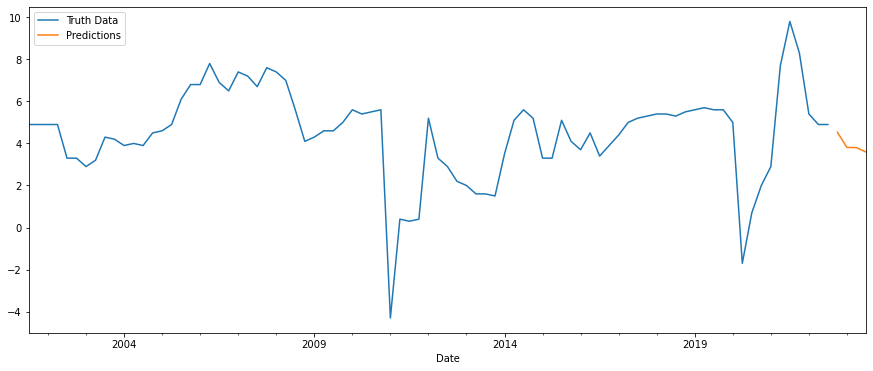

In [208]:
df['GDP Growth Rate ( annual) (%)'].plot(style='-',figsize=(15,6))
future_w_features['pred'].plot(style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [429]:
def add_lags(df):
    target_map = df['GDP Growth Rate ( annual) (%)'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('365')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [430]:
c=add_lags(df)

In [431]:
c

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,,,,
2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2001-12-31,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2002-03-31,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2002-06-30,382.49,105.10,91.960,112.170,467.380,9231.043905,2.644360,329.800,754.4,10.485,4.9,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
2002-09-30,407.09,68.82,91.620,114.420,453.110,9231.043905,2.736786,343.555,738.4,10.485,3.3,49.050000,52.7,52.3,52.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,641.24,118.52,147.355,183.215,722.365,9231.043905,5.891552,982.102,8145.9,7.500,9.8,49.266667,53.9,54.5,54.30,NaN,NaN,NaN
2021-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,5.887123,982.102,7437.2,7.400,8.3,48.800000,54.5,54.2,55.30,NaN,NaN,NaN
2022-03-31,641.24,118.52,147.355,183.215,722.365,9231.043905,8.849226,982.102,8045.7,7.200,5.4,47.500000,52.4,53.3,52.80,NaN,NaN,NaN


In [22]:
df.tail(10)

,Time Frame,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployment Rate %,GDP Growth Rate ( annual) (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,,,,,
2020-06-30,الربع الرابع 2020/2019,1018.60,82.60,85.100,196.300,990.000,9850.746269,5.400240,4742.107,7869.0,9.6,-1.7,38.333333,36.8,43.3,35.6,NaN,NaN,NaN
2020-09-30,الربع الأول 2021/2020,957.60,93.20,97.800,166.000,982.600,9738.354807,3.753137,982.102,8028.1,7.3,0.7,49.800000,52,51.6,51.6,NaN,NaN,NaN
2020-12-31,الربع الثاني 2021/2020,977.40,119.80,106.400,179.000,1024.600,10114.511352,5.213860,982.102,7493.3,7.2,2,50.166667,53,53.6,52.3,NaN,NaN,NaN
2021-03-31,الربع الثالث 2021/2020,1013.60,133.10,146.100,238.200,1054.600,10379.921260,4.401757,982.102,7849.6,7.4,2.9,48.666667,53.4,54.2,53,NaN,NaN,NaN
2021-06-30,الربع الرابع 2021/2020,1033.50,162.20,130.800,260.200,1066.300,10464.180569,4.640609,982.102,7849.6,7.3,7.7,48.733333,57.2,55.8,58,NaN,NaN,NaN
2021-09-30,الربع الأول 2022/2021,641.24,118.52,147.355,183.215,722.365,9231.043905,5.891552,982.102,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3,NaN,NaN,NaN
2021-12-31,الربع الثاتي 2022/2021,641.24,118.52,147.355,183.215,722.365,9231.043905,5.887123,982.102,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3,NaN,NaN,NaN
2022-03-31,الربع الثالث 2022/2021,641.24,118.52,147.355,183.215,722.365,9231.043905,8.849226,982.102,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8,NaN,NaN,NaN
2022-06-30,الربع الراابع 2021/2022,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,7.2,NaN,46.366667,52,52.3,52.7,NaN,NaN,NaN


In [26]:
target_map = df['GDP Growth Rate ( annual) (%)'].to_dict()

In [27]:
target_map

{Timestamp('2001-09-30 00:00:00'): '-',
 Timestamp('2001-12-31 00:00:00'): '-',
 Timestamp('2002-03-31 00:00:00'): '-',
 Timestamp('2002-06-30 00:00:00'): '-',
 Timestamp('2002-09-30 00:00:00'): 3.3,
 Timestamp('2002-12-31 00:00:00'): 3.3,
 Timestamp('2003-03-31 00:00:00'): 2.9,
 Timestamp('2003-06-30 00:00:00'): 3.2,
 Timestamp('2003-09-30 00:00:00'): 4.3,
 Timestamp('2003-12-31 00:00:00'): 4.2,
 Timestamp('2004-03-31 00:00:00'): 3.9,
 Timestamp('2004-06-30 00:00:00'): 4,
 Timestamp('2004-09-30 00:00:00'): 3.9,
 Timestamp('2004-12-31 00:00:00'): 4.5,
 Timestamp('2005-03-31 00:00:00'): 4.6,
 Timestamp('2005-06-30 00:00:00'): 4.9,
 Timestamp('2005-09-30 00:00:00'): 6.1,
 Timestamp('2005-12-31 00:00:00'): 6.8,
 Timestamp('2006-03-31 00:00:00'): 6.8,
 Timestamp('2006-06-30 00:00:00'): 7.8,
 Timestamp('2006-09-30 00:00:00'): 6.9,
 Timestamp('2006-12-31 00:00:00'): 6.5,
 Timestamp('2007-03-31 00:00:00'): 7.4,
 Timestamp('2007-06-30 00:00:00'): 7.2,
 Timestamp('2007-09-30 00:00:00'): 6.7,
 T

In [71]:
FEATURES=data.columns.drop('var11(t)')
FEATURES=train[FEATURES]
TARGET='var11(t)'
for train_idx, val_idx in tss.split(data):
    #print(train_idx)
    print(val_idx)
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    #FEATURES=train[FEATURES]
    #TARGET='var11(t)'
train
test

[35 36 37 38 39 40 41 42 43 44]
[45 46 47 48 49 50 51 52 53 54]
[55 56 57 58 59 60 61 62 63 64]
[65 66 67 68 69 70 71 72 73 74]
[75 76 77 78 79 80 81 82 83 84]


,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),var11(t-5),var12(t-5),var13(t-5),var14(t-5),var15(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-30,0.769521,0.953718,0.702553,0.872298,0.854865,0.714672,0.386211,0.879194,0.731801,0.145161,0.702128,0.905634,0.779412,0.584,0.790179,0.809870,1.000000,0.564710,0.772029,0.906164,0.861965,0.332279,0.896562,0.731801,0.048387,0.709220,0.935211,0.730392,0.576,0.750000,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000
2020-09-30,0.809870,1.000000,0.564710,0.772029,0.906164,0.861965,0.332279,0.896562,0.731801,0.048387,0.709220,0.935211,0.730392,0.576,0.750000,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286
2020-12-31,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286,0.914258,0.448343,0.188194,0.385139,0.933566,0.819782,0.101676,0.154495,0.912879,0.000000,0.446809,1.000000,0.794118,0.824,0.745536
2021-03-31,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286,0.914258,0.448343,0.188194,0.385139,0.933566,0.819